 ---
 # Prática 0: Ejemplo Ley de Ohm
 ---
> Autores: 
>
> Fecha:2024-07-18
>
> Curso 24-45 
---

In [256]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [257]:
xlsx_name="P1_sesion1_plantillaMedidas.ods"

In [258]:
DatosTarea1 = pd.read_excel(xlsx_name,sheet_name='Tarea1',usecols='A:D')
Rmedida1=DatosTarea1["R1"].tolist()
Rmedida2=DatosTarea1["R2"].tolist()
Rmedida3=DatosTarea1["R3"].tolist()
Rmedida4=DatosTarea1["R4"].tolist()
print(f'Las medidas de las resistencias son: \nR1 Teorico: {Rmedida1[0]}    R1 Práctico: {Rmedida1[1]}')
print(f'R2 Teorico: {Rmedida2[0]}   R2 Práctico: {Rmedida2[1]}')
print(f'R3 Teorico: {Rmedida3[0]}    R3 Práctico: {Rmedida3[1]}')
print(f'R4 Teorico: {Rmedida4[0]}    R4 Práctico: {Rmedida4[1]}')



Las medidas de las resistencias son: 
R1 Teorico: 4.7    R1 Práctico: 4.58
R2 Teorico: 10.0   R2 Práctico: 9.92
R3 Teorico: 2.2    R3 Práctico: 2.14
R4 Teorico: 1.5    R4 Práctico: 1.47


Con estos valores de las resistencias y tras montar el cicuito podemos obtener el valor de la resistencia Thevenin de forma practica y teórica.

<img alt='Circuito con red muerta' src = 'ResTeorica.png' >

Con la red muerta tendríamos que: $R_{12}=\frac{1}{\frac{1}{R_1} + \frac{1}{R_2}}$ y $R_{34} = \frac{1}{\frac{1}{R_3} + \frac{1}{R_4}}$.
Al estar estas dos en serie la resistencia equivalente sería la suma de ambas 


In [259]:
DatosTarea1 = pd.read_excel(xlsx_name,sheet_name='Tarea1',usecols='E')

Rmedida5 = DatosTarea1['Rab'].tolist()
print(f'Las medidas de las resistencias de Thevenin son: \nRab Teorico: {Rmedida5[0]}    Rab Práctico: {Rmedida5[1]}')

Las medidas de las resistencias de Thevenin son: 
Rab Teorico: 4.09    Rab Práctico: 4.0


Para calcular el voltaje Thevenin 





In [260]:
DatosTarea1 = pd.read_excel(xlsx_name,sheet_name='Tarea1',usecols='G')

Voltajes = DatosTarea1['Vab'].tolist()
print(f'Las medidas de los voltajes de Thevenin son: \nVab Teorico: {Voltajes[0]}    Vab Práctico: {Voltajes[1]}')

Las medidas de los voltajes de Thevenin son: 
Vab Teorico: 3.29    Vab Práctico: 3.27


Tras colocar el potenciomentro




In [261]:
DatosTarea1 = pd.read_excel(xlsx_name,sheet_name='Tarea1',usecols='G')
DatosTarea2 = pd.read_excel(xlsx_name,sheet_name='Tarea2',usecols='A:B')

Voltaje1 = DatosTarea1['Vab'].tolist()
Voltaje2 = DatosTarea2['Vab']
Rpotenciometro = DatosTarea2['Rpotenciometro']

print(f'El voltaje Thevenini anterior es: {Voltaje1[0]}. Diviendolo entre dos obtenemos el voltaje: {Voltaje2[0]}, con el cual obtenemos una resistencia de: {Rpotenciometro[0]}')


El voltaje Thevenini anterior es: 3.29. Diviendolo entre dos obtenemos el voltaje: 1.63, con el cual obtenemos una resistencia de: 4.0


In [262]:
VoltajeThevenin = Voltaje2[0]
DatosTarea3 = pd.read_excel(xlsx_name,sheet_name='Tarea3',usecols='A:B')
#Practico
VoltajeAB = DatosTarea3['Vab'].tolist()
IntensidadAB = DatosTarea3['Iab'].tolist()
RTV = Rmedida5[1]
#Teorico
RTVTeo = Rmedida5[0]
VoltajeTeo = Voltaje1[0]

#Transformamos los vectores con numpy en arrays
VoltajeAB = np.array(VoltajeAB)
IntensidadAB = np.array(IntensidadAB)*1e-3


In [263]:
[slope, intercept],r = np.polyfit(IntensidadAB,VoltajeAB, deg=1,cov=True)
print("R=", slope,"\nOrdenada en el origen: ", intercept,"\n coorel coef=",r)

R= -3996.1148985368586 
Ordenada en el origen:  3.3016558824702007 
 coorel coef= [[ 1.73562172e+03 -8.44143292e-01]
 [-8.44143292e-01  4.82518617e-04]]


In [264]:
Rfit=slope

Vfit0=intercept

"""Genero un vector de intensidades dentro del rengo medido"""
Ifit=np.linspace(IntensidadAB[0],IntensidadAB[-1],40)

"""A partir de los parámetros ajustados genero el volaje"""
Vfit=Vfit0+Ifit*Rfit

Rteo=RTVTeo*1e3
Iteo=np.linspace(IntensidadAB[0],IntensidadAB[-1],50)
Vteo=VoltajeTeo-Iteo*Rteo

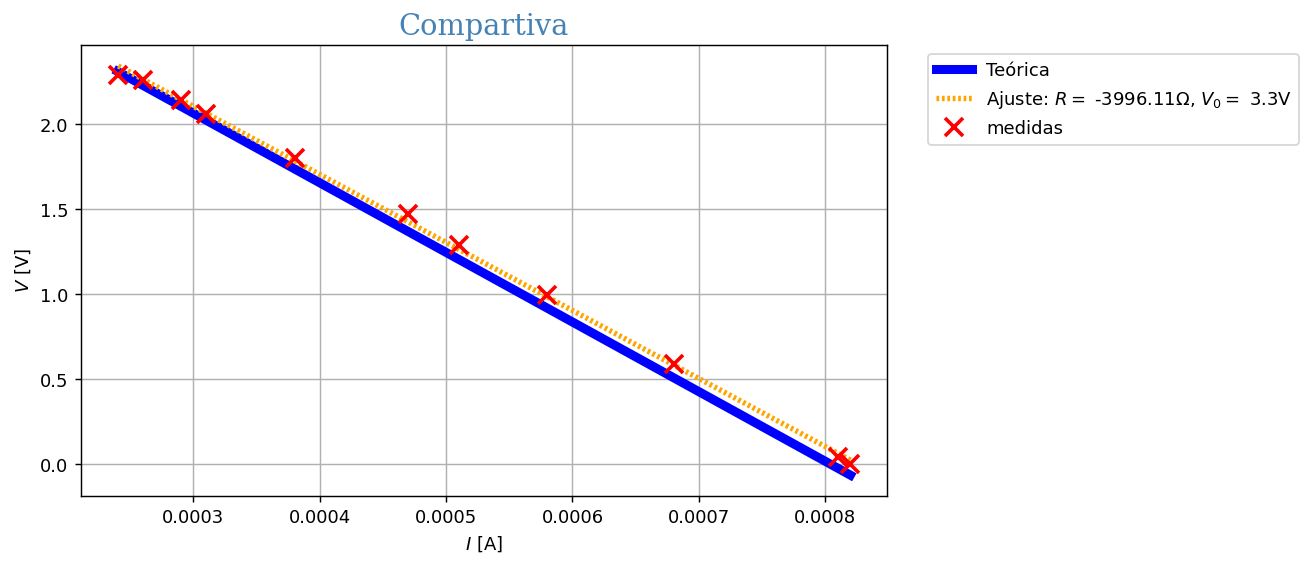

In [265]:
plt.figure(figsize=(8, 4.5), dpi=130)
plt.title("Compartiva", fontdict = {'family':'serif','color':'steelblue','size':16})
plt.plot(Iteo,Vteo, color="b", lw=5,label="Teórica")
plt.plot(Ifit,Vfit, color="orange",dashes=[0.5, 0.5],lw=3,label=fr"Ajuste: $R=$ {round(Rfit,2)}$\Omega$, $V_0=$ {round(Vfit0,2)}V")
plt.plot(IntensidadAB,VoltajeAB, color="r",ls="",marker='x',ms=10,markeredgewidth=2,label="medidas")
plt.xlabel(r"$I$ [A]")
plt.ylabel(r"$V$ [V]")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid()
plt.show()